# Regresion Lineal

Si alguna vez has usado la regresión lineal, has usado una de las formas más simples y fácilmente interpretables del aprendizaje supervisado (supervised learning), una serie de técnicas enmarcadas dentro del amplio campo del aprendizaje automático (machine learning), tan de moda últimamente.

La regresión lineal se usa para hacer predicción de variables cuantitativas, principalmente, y, aunque pueda parecer una técnica simple, sigue estando vigente pues se puede aplicar de forma sencilla a multitud de problemas. Además, sirve como punto de entrada para definir técnicas más complejas y sofisticadas dentro del análisis de regresión.

La siguiente libreta muetra lo mas básico de la regresión lineal simple, la obtención de la relación entre una variable predictora, X, y la variable cuantitativa que queremos obtener, Y, y su coeficiente de correlación.

Como siempre, antes de nada importamos las librerías que usaremos:

In [2]:
import numpy as np

from scipy import stats

import statsmodels.api as sm

import matplotlib.pyplot as plt
%matplotlib inline


from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

# Pimero lo primero
El realizar una regresion lineal en python es facil si sabemos aprovechar las librerias, y se hace asi:

Text(4,9,'Y = 0.500 X + 3.000')

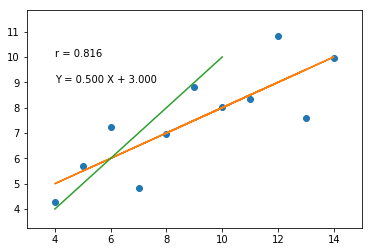

In [7]:
# X e Y serán el primer conjunto del cuarteto de Anscombe 
# (https://en.wikipedia.org/wiki/Anscombe%27s_quartet)
X = np.array([10.0, 8.0,  13.0, 9.0,  11.0, 14.0, 6.0,  4.0,  12.0,  7.0,  5.0])
Y = np.array([8.04, 6.95, 7.58, 8.81, 8.33, 9.96, 7.24, 4.26, 10.84, 4.82, 5.68])

#Identidad
Lx =  np.array([4, 10])
Ly =  np.array([4, 10])

# Calculamos los coeficientes del ajuste (a X + b)
a, b = np.polyfit(X, Y, 1)
# Calculamos el coeficiente de correlación
r = np.corrcoef(X, Y)

# Dibujamos los datos para poder visualizarlos y ver si sería lógico 
# considerar el ajuste usando un modelo lineal
plt.plot(X, Y, 'o')
plt.xlim(np.min(X) -1, np.max(X) +1)
plt.ylim(np.min(Y) -1, np.max(Y) +1)
plt.plot(X, a * X + b)
#identidad
plt.plot( Lx,Ly )
#Etiqueta
plt.text(4, 10, 'r = {0:2.3f}'.format(r[0,1]))
plt.text(4, 9, 'Y = {0:2.3f} X + {1:2.3f}'.format(a, b))

## Regresion lineal simple, version un poco mas larga...
   

Como ya hemos comentado, con la regresion lineal simple lo que buscamos es la relacion entre un predictor, ***X***, y un predictando, ***Y***, asumiendo que la relacion entre ambas seria aproximadamente lineal. La relacion la podemos escribir asi:
   

$$Y = a X + b$$ 

donde $a$ y $b$ son dos constantes (coeficientes o parametros del modelo lineal) que definen, respectivamente, la pendiente y el termino independiente (u ordenada en el origen o intercepto). Una vez que conocemos $\hat{a}$ y $\hat{b}$ (\*), obtenidos a partir de los datos de entrenamiento (conjunto de datos que usamos para obtener los parametros del modelo) podemos predecir nuevos valores ***y*** basandonos en valores ***x***. 

<div class="alert alert-info">(*) Todos los valores estimados los pondremos con una caperuza (acento circunflexo, sombrero,...) para distinguirlos de valores teoricos que, en muchos casos, desconoceremos.</div>

donde $a$ y $b$ son dos constantes (coeficientes o parametros del modelo lineal) que definen, respectivamente, la pendiente y el termino independiente (u ordenada en el origen o intercepto). Una vez que conocemos $\\hat{a}$ y $\\hat{b}$ (\\*), obtenidos a partir de los datos de entrenamiento (conjunto de datos que usamos para obtener los parametros del modelo) podemos predecir nuevos valores ***y*** basandonos en valores ***x***.
    
   

$$\hat{y} = \hat{a} x + \hat{b}$$

Para conocer $\hat{a}$ y $\hat{b}$ usamos los datos disponibles, como hemos comentado anteriormente. Tenemos los siguientes pares de datos:

$$(x_{1}, y_{1}), (x_{2}, y_{2}), (x_{3}, y_{3}),..., (x_{n}, y_{n})$$

que representan medidas de ***X*** e ***Y***. Lo que trataremos de hacer con estos datos sera obtener los parametros del ajuste lineal, $\hat{a}$ y $\hat{b}$, de tal forma que el modelo lineal se ajuste bien a los datos, es decir, queremos encontrar una recta con una pendiente y una ordenada en el origen que minimice la distancia a todos los puntos $(x_{i}, y_{i})$

Existen varias formas de medir esta proximidad y, entre ellos, el mas usado es el ajuste por minimos cuadrados ([least squares](https://en.wikipedia.org/wiki/Least_squares)).

### Ajuste por minimos cuadrados

El metodo de minimos cuadrados encontrara el valor optimo cuando la suma de los residuos al cuadrado, $RSS=\sum_{i=1}^{n}{r_i}^2$ (RSS, Residual Sum of Squares), sea minima.

El residuo se define como la diferencia entre el valor actual de la variable dependiente y el valor predicho por el modelo, $r_{i} = y_{i} - \hat{y}_{i}$. De esta forma tendremos lo siguiente:

$$\frac{\partial{RSS}}{\partial{\hat{a}}} = 0 \longrightarrow \hat{a} = \frac{\sum^{n}_{i=1}(x_i - \bar{x})(y_i - \bar{y})}{\sum^{n}_{i=1}(x_i - \bar{x})^2}$$

$$\frac{\partial{RSS}}{\partial{\hat{b}}} = 0 \longrightarrow \hat{b} = \bar{y} - \hat{b}\bar{x}$$

donde $\bar{x}$ e $\bar{y}$ son los promedios de las muestras.

Las ecuaciones anteriores son el resultado para el caso concreto de la regresion lineal simple. Si queremos generalizar a regresion lineal multiple, mas de un termino independiente, a lo mejor lo veremos mas adelante si encuentro el tiempo necesario. Para los impacientes, si en realidad alguna vez lleguemos a verlo, puedes visitar [este enlace](https://en.wikipedia.org/wiki/Linear_least_squares_%28mathematics%29#Derivation_of_the_normal_equations).

### Ejemplo practico del calculo de los parametros

Como estamos usando un conjunto de datos pequeños ([uno de los casos del cuarteto de Anscombe](http://pybonacci.org/2012/10/05/la-importancia-de-inspeccionar-los-datos/)) podemos realizar el calculo de forma manual y asi ver, paso a paso, como seria:

* 1 - Calculamos el valor medio de ***X*** e ***Y***
* 2 - Calculamos $\hat{a}$ y $\hat{b}$ con la ayuda de los valores medios previamente calculados
* 3 - Comparamos el resultado con lo que obtenemos usando `numpy.polyfit`

In [4]:
# Los datos de partida
X = np.array([10.0, 8.0, 13.0, 9.0, 11.0, 14.0, 6.0, 4.0, 12.0, 7.0, 5.0])
Y = np.array([8.04, 6.95, 7.58, 8.81, 8.33, 9.96, 7.24, 4.26, 10.84, 4.82, 5.68])

# Primero calculamos la media de X e Y
xmean = X.mean()
ymean = Y.mean()

# Como b depende de a primero hemos de obtener a
ahat = np.sum((X - xmean) * (Y - ymean)) / np.sum((X - xmean)**2)
bhat = ymean - ahat * xmean

# Calculamos los valores usando numpy.polyfit
a, b = np.polyfit(X, Y, 1)

# Mostramos resultados
print('ajuste paso a paso, a, b = ', ahat, bhat)
print('ajuste con polyfit, a, b = ', a, b)
print(np.testing.assert_almost_equal(ahat, a, decimal = 7),
      np.testing.assert_almost_equal(bhat, b, decimal = 7))

ajuste paso a paso, a, b =  0.5000909090909091 3.0000909090909103
ajuste con polyfit, a, b =  0.5000909090909095 3.000090909090909
None None


Podemos ver como el valor minimo para los monimos cuadrados se encuentra en ese punto si dibujamos la suma de residuos al cuadrado (RSS) en funcion de $a$ y $b$. En el siguiente grafico, si se ejecuta de forma interactiva, usando `interact`, veremos que si modificamos el valor de la pendiente y de la ordenada en el origen el valor de RSS sera superior al optimo excepto cuando $\hat{a} = 0.5, \hat{b} = 3$.

In [5]:
a = np.linspace(0.3,0.7,100)
b = np.linspace(0,6,100)
RSS = np.empty((len(a), len(b)))
for i, ai in enumerate(a):
    for j, bj in enumerate(b):
        RSS[i, j] = np.sum((Y - bj - ai * X)**2)

def plotea(ai, bi):
    xx, yy = np.meshgrid(b, a)    
    levels = np.array([10,20,30,50,80,120,180,250,400,1000,2000])
    colors = 1 - levels / levels.max()
    plt.figure(figsize = (15,7))
    plt.subplot(121)
    plt.plot(X, Y, 'o')
    plt.plot([X.min(), X.max()], 
             [X.min() * ai + bi, X.max() * ai + bi])
    plt.text(5, 12, 'RSS={:5.2f}'.format(np.sum((Y - bi - ai * X)**2)))
    plt.ylim(0,14)
    plt.subplot(122)
    plt.contourf(yy, xx, RSS, levels = levels, colors = colors.astype('str'))
    CS = plt.contour(yy, xx, RSS, levels = levels, colors = 'k')
    plt.clabel(CS, inline=1, fontsize=10)
    plt.scatter(ahat, bhat, color = 'y')
    plt.scatter(ai, bi, color = 'g', s = 200, marker = 's')
    plt.grid()

interact(plotea, ai = [0.30, 0.70], bi = [0.0, 6.0])

interactive(children=(Dropdown(description='ai', options=(0.3, 0.7), value=0.3), Dropdown(description='bi', options=(0.0, 6.0), value=0.0), Output()), _dom_classes=('widget-interact',))

<function __main__.plotea>

### Precision en la estimacipn de los parametros

Nuestro modelo es una aproximacion a la realidad y esta sujeto a errores. Estamos simplificando una relacion que podria no ser exactamente lineal, que podria depender de alguna otra variable que desconocemos, podria haber errores de medida en la obtencion de nuestro conjunto de datos ***X*** e ***Y***, etc. Es por ello que la relacion real la podriamos escribir como:

$$Y = a X + b + \epsilon$$

donde $\epsilon$ es un termino de error aleatorio con media igual a cero y que consideraremos, normalmente, independiente de ***X***.

El modelo dado por la ecuacion anterior, $Y = a X + b + \epsilon$,  es la **linea de regresion de la poblacion**, la cual, normalmente, desconoceremos. La estimacion, a partir de los datos observados, de los coeficientes de regresion de minimos cuadrados caracterizan la **linea de minimos cuadrados**. En general, en el mundo real, tenemos acceso a una serie de observaciones a partir de las cuales podemos calcular la linea de minimos cuadrados. Sin embargo, la linea de regresion de la poblacion no la podemos observar ya que nos falta parte de la informacion.

Veamos un hipotetico caso donde conocemos la relacion entre ***X*** e ***Y*** y que esta es $Y = 5X + 1$. Vamos a generar varios conjuntos de datos para esa relacion añadiendo el termino de error. La siguiente celda de codigo generara varios conjuntos de datos a partir de la relacion $Y = 5X + 1 + \epsilon$. Si aumentamos el numero de lineas usadas (lineas azules) o el numero de puntos de cada conjunto veremos que, en promedio, el global (linea amarilla) se va ajustando cada vez mas a la linea de regresion de la poblacion (linea negra). Tambien observamos que el conjunto de lineas azules (lineas de minimos cuadrados para cada conjunto de datos) a veces quedan por encima y a veces quedan por debajo pero en promedio vemos que quedan cerca de la linea de regresion (linea negra).

In [6]:
def genera_líneas(numero_lineas, numero_puntos):
    a = 5
    b = 1
    X = np.linspace(0, 100, int(numero_puntos))
    Y = np.empty((len(X), int(numero_lineas) ))
    for i in range(Y.shape[1]):
        eps = np.random.normal(scale = 100, size = numero_puntos)
        Y[:,i] = a * X + b + eps
        ahat, bhat = np.polyfit(X, Y[:,i], deg = 1)
        plt.plot(X, X * ahat + bhat, color = (0,0,0.9))
    plt.plot(X, X * a + b, 'k', lw = 10)
    ahat, bhat = np.polyfit(X, Y.mean(axis = 1), deg = 1)
    plt.plot(X, X * ahat + bhat, 'y', lw = 5)
    plt.text(20, 400, 'ahat = {:3.2f}'.format(ahat))
    plt.text(20, 375, 'bhat = {:3.2f}'.format(bhat))
    plt.xlim(0,100)
    plt.ylim(-50,550)
    
interact(genera_líneas, 
         numero_lineas = widgets.IntSlider(min = 3, 
                                                   max = 100, 
                                                   step = 1, 
                                                   value = 3, 
                                                   description = "Número de líneas"), 
         numero_puntos = widgets.IntSlider(min = 5, 
                                                   max = 100, 
                                                   step = 1, 
                                                   value = 5, description="Puntos para cada línea"))

interactive(children=(IntSlider(value=3, description='Número de líneas', min=3), IntSlider(value=5, description='Puntos para cada línea', min=5), Output()), _dom_classes=('widget-interact',))

<function __main__.genera_líneas>

Las diferencias que vemos en el anterior grafico entre la linea negra y el resto de lineas es debido a que usamos una muestra (lineas azules) para intentar obtener caracteristicas de una poblacion mas grande (linea negra). Si la muestra de datos es mas grande o si usamos un mayor numero de lineas vemos que, en promedio (linea amarilla), nos vamos acercando cada vez mas al valor esperado. Como hemos comentado en el parrafo anterior, hay veces que las lineas pueden quedar por encima y a veces pueden quedar por debajo en mayor o menor proporcion pero, en conjunto, vemos que a medida que crece el numero de datos para cada linea o el numero de lineas, nos vamos acercando a un valor promedio. Esto nos esti indicando que en el caso de la estimacion de los parametros mediante el metodo de minimos cuadrados es no sesgada ([unbiased](https://en.wikipedia.org/wiki/Bias_of_an_estimator)).

Muy bien, pero normalmente solo tenemos un conjunto de datos y solo podemos hacer una estimacion con ese numero de datos. En determinados rangos podemos estar subreestimando mientras que en otros rangos podemos estar infraestimando (o viceversa). 

¿Como podemos estimar el error de la estimacion?

Para ello podemos usar el **error estandar** ([standard error](https://en.wikipedia.org/wiki/Standard_error)) usando las siguientes formulas para el caso de una regresion lineal simple:

$$SE(\hat{a})^2 = \frac{\sigma^2}{\sum_{i=1}^{n}(x_{i}-\bar{x})^2}$$

$$SE(\hat{b})^2 = \sigma^2[\frac{1}{n} + \frac{\bar{x}^2}{\sum_{i=1}^{n}(x_{i}-\bar{x})^2}]$$

siendo $\sigma^2=Var(\epsilon)$. 

Para que las formulas anteriores sean estrictamente validas necesitamos que los errores $\epsilon_{i}$  para cada observacion no estan correlacionados con la varianza $\sigma^2$. Normalmente podemos encontrar cierta correlacion pero las formulas siguen siendo una buena aproximacion.

En general, $\sigma^2$ no se conoce pero lo podemos obtener a partir de los datos. Su estimacion se conoce como error estandar residual (residual standard error) y se puede obtener a partir de $RSE (tambien\ conocido\ como\ \hat{\sigma}) = \sqrt{RSS / (n - 2)}$. Siendo rigurosos, cuando $\sigma^2$ se obtiene a partir de la muestra deberiamos escribir el error estandar con una caperuza, e.g. $\hat{SE}(\hat{a})$, para indicar que es una estimacion. Si en algun momento se nos olvida poner la caperuza tened en cuenta que nos referimos a una estimacion.